In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

intra_aims_ml_challenge_path = kagglehub.competition_download('intra-aims-ml-challenge')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
import matplotlib as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intra-aims-ml-challenge/test_set.csv
/kaggle/input/intra-aims-ml-challenge/submission.csv
/kaggle/input/intra-aims-ml-challenge/train_set.csv


In [ ]:
file_test= '/kaggle/input/intra-aims-ml-challenge/test_set.csv'
file_train='/kaggle/input/intra-aims-ml-challenge/train_set.csv'
X_train= pd.read_csv(file_train)
X_test= pd.read_csv(file_test)
X_train = X_train.drop("Product_Code", axis =1)
X_train = X_test.drop("Product_Code", axis =1)


In [ ]:
X_train.head()

,Id,Product_Weight,Fat_Category,Visibility_Score,Category_Type,Retail_Price,Store_Code,Year_Opened,Store_Size,Location_Class,Store_Category
0,1,8.93,Reduced,0.000000,HomeGoods,53.8614,OUT013,1987,Spacious,Rural,Superstore A
1,2,19.20,Standard,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Suburban,Superstore A
2,3,NaN,Reduced,0.026016,Snack Foods,255.8356,OUT027,1985,Standard,Rural,Superstore C
3,4,NaN,Reduced,0.028460,HomeGoods,149.9708,OUT027,1985,Standard,Rural,Superstore C
4,5,9.10,Standard,0.000000,Breads,173.2054,OUT045,2002,NaN,Suburban,Superstore A


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                773 non-null    int64  
 1   Product_Weight    636 non-null    float64
 2   Fat_Category      773 non-null    object 
 3   Visibility_Score  773 non-null    float64
 4   Category_Type     773 non-null    object 
 5   Retail_Price      773 non-null    float64
 6   Store_Code        773 non-null    object 
 7   Year_Opened       773 non-null    int64  
 8   Store_Size        548 non-null    object 
 9   Location_Class    773 non-null    object 
 10  Store_Category    773 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 66.6+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                773 non-null    int64  
 1   Product_Code      773 non-null    object 
 2   Product_Weight    636 non-null    float64
 3   Fat_Category      773 non-null    object 
 4   Visibility_Score  773 non-null    float64
 5   Category_Type     773 non-null    object 
 6   Retail_Price      773 non-null    float64
 7   Store_Code        773 non-null    object 
 8   Year_Opened       773 non-null    int64  
 9   Store_Size        548 non-null    object 
 10  Location_Class    773 non-null    object 
 11  Store_Category    773 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 72.6+ KB


In [ ]:
X_test.head()

,Id,Product_Code,Product_Weight,Fat_Category,Visibility_Score,Category_Type,Retail_Price,Store_Code,Year_Opened,Store_Size,Location_Class,Store_Category
0,1,NCD19,8.93,Reduced,0.000000,HomeGoods,53.8614,OUT013,1987,Spacious,Rural,Superstore A
1,2,FDU28,19.20,Standard,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Suburban,Superstore A
2,3,FDY45,NaN,Reduced,0.026016,Snack Foods,255.8356,OUT027,1985,Standard,Rural,Superstore C
3,4,NCP18,NaN,Reduced,0.028460,HomeGoods,149.9708,OUT027,1985,Standard,Rural,Superstore C
4,5,FDV11,9.10,Standard,0.000000,Breads,173.2054,OUT045,2002,NaN,Suburban,Superstore A


In [ ]:
X_train['VisibilityPrice'] = X_train["Visibility_Score"]* X_train['Retail_Price']
# X_train['Price/Mass'] = X_train["Retail_Price"]* X_train['Product_Weight']
# X_train['Size+Location'] = X_train['Location_Class'] + X_train['Store_Size']

X_test['VisibilityPrice'] = X_test["Visibility_Score"]* X_test['Retail_Price']
# X_test['Price/Mass'] = X_test["Retail_Price"]* X_test['Product_Weight']
# X_test['Size+Location'] = X_test['Location_Class'] + X_test['Store_Size']
X_train['age'] = 2024 - X_train['Year_Opened']
X_test['age'] = 2024 - X_test['Year_Opened']
X_train.drop('Year_Opened', axis = 1)
X_test.drop('Year_Opened', axis = 1)

,Id,Product_Code,Product_Weight,Fat_Category,Visibility_Score,Category_Type,Retail_Price,Store_Code,Store_Size,Location_Class,Store_Category,VisibilityPrice,age,Price/Mass
0,1,NCD19,8.930,Reduced,0.000000,HomeGoods,53.8614,OUT013,Spacious,Rural,Superstore A,0.000000,37,480.982302
1,2,FDU28,19.200,Standard,0.094450,Frozen Foods,187.8214,OUT017,NaN,Suburban,Superstore A,17.739654,17,3606.170880
2,3,FDY45,NaN,Reduced,0.026016,Snack Foods,255.8356,OUT027,Standard,Rural,Superstore C,6.655696,39,NaN
3,4,NCP18,NaN,Reduced,0.028460,HomeGoods,149.9708,OUT027,Standard,Rural,Superstore C,4.268133,39,NaN
4,5,FDV11,9.100,Standard,0.000000,Breads,173.2054,OUT045,NaN,Suburban,Superstore A,0.000000,22,1576.169140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,769,FDT48,NaN,Reduced,0.000000,Baking Goods,196.5084,OUT027,Standard,Rural,Superstore C,0.000000,39,NaN
769,770,FDL10,8.395,Reduced,0.039554,Snack Foods,99.1042,OUT049,Standard,Urban,Superstore A,3.919928,25,831.979759
770,771,FDT56,16.000,Standard,0.115827,Produce,56.0246,OUT045,NaN,Suburban,Superstore A,6.489152,22,896.393600
771,772,NCN18,NaN,Reduced,0.124111,HomeGoods,111.7544,OUT027,Standard,Rural,Superstore C,13.869921,39,NaN


In [ ]:
one_hot_encoded_X_train=pd.get_dummies(X_train,columns=['Fat_Category','Category_Type','Store_Code','Store_Size','Location_Class','Store_Category'])
one_hot_encoded_X_test=pd.get_dummies(X_test,columns=['Fat_Category','Category_Type','Store_Code','Store_Size','Location_Class','Store_Category'])
one_hot_encoded_X_train, one_hot_encoded_X_test = one_hot_encoded_X_train.align(one_hot_encoded_X_test, join='left', axis=1)

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputed_X_train = pd.DataFrame(imputer.fit_transform(one_hot_encoded_X_train))
imputed_X_test = pd.DataFrame(imputer.transform(one_hot_encoded_X_test))
imputed_X_train.columns = one_hot_encoded_X_train.columns
imputed_X_test.columns = one_hot_encoded_X_test.columns

In [ ]:
imputed_X_train.corr()

,Id,Product_Weight,Visibility_Score,Retail_Price,Year_Opened,VisibilityPrice,age,Fat_Category_Reduced,Fat_Category_Standard,Category_Type_Baking Goods,...,Store_Size_Compact,Store_Size_Spacious,Store_Size_Standard,Location_Class_Rural,Location_Class_Suburban,Location_Class_Urban,Store_Category_MiniMart,Store_Category_Superstore A,Store_Category_Superstore B,Store_Category_Superstore C
Id,1.000000,-1.851515e-02,0.013911,0.013020,0.037429,0.008523,-0.037429,-0.078223,0.078223,0.066030,...,0.020843,-0.025390,0.023651,-0.009313,0.002638,0.007487,-0.055072,0.019059,0.026247,1.217455e-03
Product_Weight,-0.018515,1.000000e+00,-0.028578,0.044865,0.000887,0.006103,-0.000887,0.084637,-0.084637,-0.060801,...,0.063568,-0.037665,-0.006584,-0.022577,-0.019241,0.045548,0.016939,-0.000891,-0.015929,-9.279432e-17
Visibility_Score,0.013911,-2.857833e-02,1.000000,-0.008910,-0.042705,0.814448,0.042705,-0.079141,0.079141,0.072404,...,0.064639,-0.058776,-0.083627,-0.000369,-0.052974,0.057016,0.325787,-0.160833,-0.005406,-8.328631e-02
Retail_Price,0.013020,4.486522e-02,-0.008910,1.000000,0.002682,0.458756,-0.002682,0.021919,-0.021919,-0.048556,...,0.075514,0.038463,-0.040234,-0.006559,-0.012708,0.020839,-0.007407,0.025446,0.013773,-4.363042e-02
Year_Opened,0.037429,8.869341e-04,-0.042705,0.002682,1.000000,-0.058984,-1.000000,0.036774,-0.036774,0.034104,...,-0.052126,-0.439453,-0.039088,-0.336220,0.533174,-0.197656,-0.272469,0.250865,0.474396,-5.628380e-01
VisibilityPrice,0.008523,6.102561e-03,0.814448,0.458756,-0.058984,1.000000,0.058984,-0.072787,0.072787,0.039497,...,0.115871,-0.042760,-0.108678,-0.023708,-0.055188,0.085213,0.293716,-0.124188,-0.023783,-8.723377e-02
age,-0.037429,-8.869341e-04,0.042705,-0.002682,-1.000000,0.058984,1.000000,-0.036774,0.036774,-0.034104,...,0.052126,0.439453,0.039088,0.336220,-0.533174,0.197656,0.272469,-0.250865,-0.474396,5.628380e-01
Fat_Category_Reduced,-0.078223,8.463735e-02,-0.079141,0.021919,0.036774,-0.072787,-0.036774,1.000000,-1.000000,-0.092594,...,0.027776,-0.032721,-0.030109,-0.047228,0.018118,0.032907,-0.002639,0.030473,0.001838,-4.410509e-02
Fat_Category_Standard,0.078223,-8.463735e-02,0.079141,-0.021919,-0.036774,0.072787,0.036774,-1.000000,1.000000,0.092594,...,-0.027776,0.032721,0.030109,0.047228,-0.018118,-0.032907,0.002639,-0.030473,-0.001838,4.410509e-02
Category_Type_Baking Goods,0.066030,-6.080143e-02,0.072404,-0.048556,0.034104,0.039497,-0.034104,-0.092594,0.092594,1.000000,...,0.032890,-0.027955,-0.045065,0.001610,0.005332,-0.007480,0.100300,-0.070040,0.059234,-5.510589e-02


<Axes: >

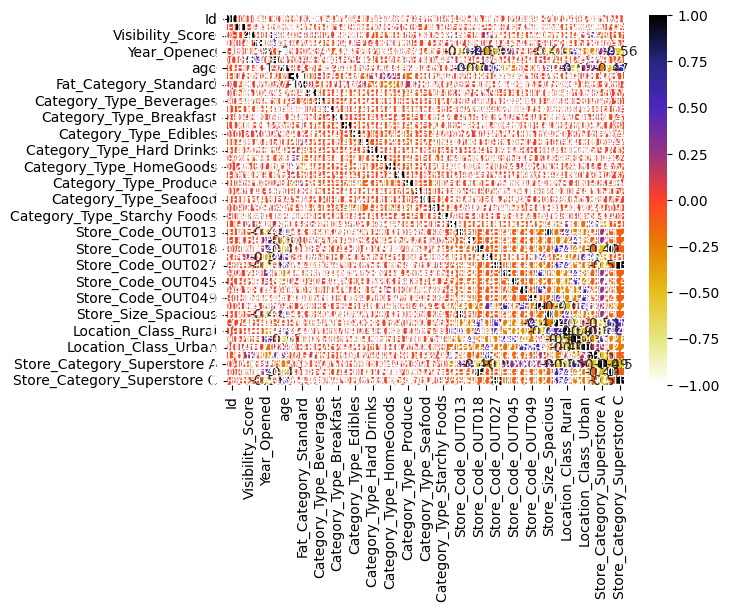

In [ ]:
cor = imputed_X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [ ]:

corr = imputed_X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,Product_Weight,Visibility_Score,Retail_Price,Year_Opened,VisibilityPrice,age,Fat_Category_Reduced,Fat_Category_Standard,Category_Type_Baking Goods,Category_Type_Beverages,Category_Type_Breads,Category_Type_Breakfast,Category_Type_Canned,Category_Type_Edibles,Category_Type_Frozen Foods,Category_Type_Hard Drinks,Category_Type_Health and Hygiene,Category_Type_HomeGoods,Category_Type_Others,Category_Type_Produce,Category_Type_Proteins,Category_Type_Seafood,Category_Type_Snack Foods,Category_Type_Starchy Foods,Store_Code_OUT010,Store_Code_OUT013,Store_Code_OUT017,Store_Code_OUT018,Store_Code_OUT019,Store_Code_OUT027,Store_Code_OUT035,Store_Code_OUT045,Store_Code_OUT046,Store_Code_OUT049,Store_Size_Compact,Store_Size_Spacious,Store_Size_Standard,Location_Class_Rural,Location_Class_Suburban,Location_Class_Urban,Store_Category_MiniMart,Store_Category_Superstore A,Store_Category_Superstore B,Store_Category_Superstore C
Id,1.000000,-0.018515,0.013911,0.013020,0.037429,0.008523,-0.037429,-0.078223,0.078223,0.066030,0.004737,-0.037142,-0.001909,-0.020624,0.011781,-0.049325,-0.046502,0.026481,0.025535,-0.054454,-0.005593,0.024568,-0.001616,0.010669,0.004797,-0.023241,-0.025390,-0.018119,0.026247,-0.052440,0.001217,0.027242,-0.004879,0.042159,0.008061,0.020843,-0.025390,0.023651,-0.009313,0.002638,0.007487,-0.055072,0.019059,0.026247,0.001217
Product_Weight,-0.018515,1.000000,-0.028578,0.044865,0.000887,0.006103,-0.000887,0.084637,-0.084637,-0.060801,-0.040975,-0.051490,0.049173,-0.008909,0.067294,-0.066594,-0.097545,0.034774,0.052883,0.053102,0.016971,0.013627,-0.067146,0.028956,-0.005558,0.022954,-0.037665,-0.020275,-0.015929,-0.000000,-0.000000,0.033068,-0.039366,0.058103,0.006586,0.063568,-0.037665,-0.006584,-0.022577,-0.019241,0.045548,0.016939,-0.000891,-0.015929,-0.000000
Visibility_Score,0.013911,-0.028578,1.000000,-0.008910,-0.042705,0.814448,0.042705,-0.079141,0.079141,0.072404,-0.038146,-0.009935,0.080455,0.035947,0.036906,0.027107,-0.052742,-0.099102,-0.102769,-0.051231,0.058209,0.001936,-0.004876,0.037947,-0.053745,0.194206,-0.058776,-0.011750,-0.005406,0.252333,-0.083286,-0.022870,-0.043298,-0.074170,-0.035843,0.064639,-0.058776,-0.083627,-0.000369,-0.052974,0.057016,0.325787,-0.160833,-0.005406,-0.083286
Retail_Price,0.013020,0.044865,-0.008910,1.000000,0.002682,0.458756,-0.002682,0.021919,-0.021919,-0.048556,-0.051190,-0.083883,-0.007488,0.012034,0.103051,-0.043026,0.036425,-0.001582,0.075876,-0.011021,-0.012364,-0.018787,-0.005457,-0.022562,0.070620,-0.021642,0.038463,-0.017119,0.013773,0.011844,-0.043630,0.049665,-0.048338,0.049937,-0.030840,0.075514,0.038463,-0.040234,-0.006559,-0.012708,0.020839,-0.007407,0.025446,0.013773,-0.043630
Year_Opened,0.037429,0.000887,-0.042705,0.002682,1.000000,-0.058984,-1.000000,0.036774,-0.036774,0.034104,0.057014,-0.044316,-0.039765,0.005309,0.022959,-0.027079,0.033757,0.003923,-0.000537,0.034704,-0.071900,0.015242,-0.050387,0.019024,-0.009882,0.003837,-0.439453,0.368869,0.474396,-0.380718,-0.562838,0.251059,0.187046,-0.036510,0.044259,-0.052126,-0.439453,-0.039088,-0.336220,0.533174,-0.197656,-0.272469,0.250865,0.474396,-0.562838
VisibilityPrice,0.008523,0.006103,0.814448,0.458756,-0.058984,1.000000,0.058984,-0.072787,0.072787,0.039497,-0.040294,-0.054654,0.062905,0.051227,0.093621,-0.019193,-0.030089,-0.075638,-0.072124,-0.061945,0.032998,0.001657,-0.004931,0.045405,-0.036267,0.155775,-0.042760,-0.035023,-0.023783,0.247204,-0.087234,-0.004311,-0.042313,-0.015537,-0.051545,0.115871,-0.042760,-0.108678,-0.023708,-0.055188,0.085213,0.293716,-0.124188,-0.023783,-0.087234
age,-0.037429,-0.000887,0.042705,-0.002682,-1.000000,0.058984,1.000000,-0.036774,0.036774,-0.034104,-0.057014,0.044316,0.039765,-0.005309,-0.022959,0.027079,-0.033757,-0.003923,0.000537,-0.034704,0.071900,-0.015242,0.050387,-0.019024,0.009882,-0.003837,0.439453,-0.368869,-0.474396,0.380718,0.562838,-0.251059,-0.187046,0.036510,-0.044259,0.052126,0.439453,0.039088,0.336220,-0.533174,0.197656,0.272469,-0.250865,-0.474396,

In [ ]:
sns.displot(kind="kde", data=imputed_X_train, x="Location_Class_Urban",y ='Total_Sales')
sns.displot(kind="kde", data=imputed_X_train, x="Store_Size_Spacious",y ='Total_Sales')

In [ ]:
X_train_1 = imputed_X_train.drop(columns=['Total_Sales','Id'])
y_train_1 = imputed_X_train['Total_Sales','Id']
X_test_1 = imputed_X_test.drop(columns=['Total_Sales','Id'])
y_test_1 = imputed_X_test['Total_Sales','Id']

X_train_1 = X_train1.drop(columns=['Total_Sales','Id'])

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X_train_1, y_train_1)

# random_search= RandomizedSearchCV(
#  estimator=model,
#  param_distributions= param_grid,
#  scoring='neg_mean_squared_error',
#  cv=3,
#  n_iter=20,
#  verbose=1,
#  n_jobs=-1
# )
# random_search.fit(X_train_1,y_train_1)
# best_params_random= random_search.best_params_
# best_score_random= random_search.best_score_
# print(best_params_random)
# print(best_score_random)

In [ ]:
param_grid={
    'n_estimators':[100,150,200,250,300,350,400],
    'learning_rate':[0.01,0.05,0.1,0.2,0.4,0.3],
    'max_depth':[2,5,8,11],
    'subsample':[0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.6,0.7,0.8,1.0],
}

xgb_model= XGBRegressor(objective='reg:squarederror',random_state=0)


In [ ]:
random_search= RandomizedSearchCV(
 estimator=xgb_model,
 param_distributions= param_grid,
 scoring='neg_mean_squared_error',
 cv=3,
 n_iter=20,
 verbose=1,
 n_jobs=-1
)
random_search.fit(X_train_1,y_train_1)
best_params_random= random_search.best_params_
best_score_random= random_search.best_score_
print(best_params_random)
print(best_score_random)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters(Random Search): {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best Mean Squared Error(Random Search): -1158626.2865781626


In [ ]:
xgb_model_best= XGBRegressor(**best_params_random,objective='reg:squarederror')
xgb_model_best.fit(X_train_1,y_train_1)
y_preds= xgb_model_best.predict(X_test_1)
mse_= mean_squared_error(y_test_1,y_preds)
print(mse)

In [ ]:
pd.set_option('display.max_rows', output.shape[0]+1)
output.head(773)

,Id,Retail_Price
0,1,931.042664
1,2,2826.835205
2,3,6015.278809
3,4,3777.323242
4,5,2836.806396
5,6,3115.439453
6,7,3373.739746
7,8,323.300293
8,9,2931.285156
9,10,3650.644287
